<a href="https://colab.research.google.com/github/ma850419/Various_scripts/blob/main/replicate_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
#from google.colab import files

# Function to replicate each polygon N times in a GeoDataFrame
def replicate_polygons(gdf, N):
    replicated_gdf = gpd.GeoDataFrame(pd.concat([gdf] * N, ignore_index=True), crs=gdf.crs)
    return replicated_gdf

# Function to read, process, and save shapefiles from a directory
def process_shapefiles_from_directory(directory, N):
    # List all shapefiles in the directory
    print(  os.listdir(directory))
    shapefiles = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.shp')]

    # Iterate through the shapefiles and process them
    for shapefile in shapefiles:
        # Read the shapefile
        gdf = gpd.read_file(shapefile)

        # Print some basic information about the shapefile
        print(f"Processing shapefile: {shapefile}")
        print(gdf.head())

        # Replicate each polygon N times
        replicated_gdf = replicate_polygons(gdf, N)

        # Define the output shapefile path
        output_shapefile = shapefile.replace('.shp', f'_replicated_{N}.shp')

        # Save the replicated shapefile
        replicated_gdf.to_file(output_shapefile, driver='ESRI Shapefile')
        print(f"Saved replicated shapefile: {output_shapefile}")

        # Plot the replicated shapefile
        replicated_gdf.plot()
        plt.title(f"{os.path.basename(output_shapefile)}")
        plt.show()

# Upload shapefiles if running in Google Colab
#uploaded = files.upload()

# Process shapefiles from the current working directory and replicate each polygon 5 times (N=5)
process_shapefiles_from_directory("C:/Users/Dr. Mohamad Awad/Documents/douma/", 5)


Enter the directory name: C:/Users/Dr. Mohamad Awad/Documents/douma/
Enter the shapefile name: douma.shp
Enter the number of times to replicate each polygon: 5
Processing shapefile: C:/Users/Dr. Mohamad Awad/Documents/douma/douma.shp
   OID_     Name  SymbolID                                           geometry
0     0  sample1         1  POLYGON Z ((36.39163 33.56927 0.00000, 36.3899...
1     0  sample2         1  POLYGON Z ((36.39111 33.56894 0.00000, 36.3893...
2     0  sample3         1  POLYGON Z ((36.40100 33.57704 0.00000, 36.4010...
3     0  sample4         1  POLYGON Z ((36.40405 33.57952 0.00000, 36.4032...
4     0  sample6         1  POLYGON Z ((36.40743 33.57915 0.00000, 36.4068...
Saved replicated shapefile: C:/Users/Dr. Mohamad Awad/Documents/douma/douma_replicated_5.shp


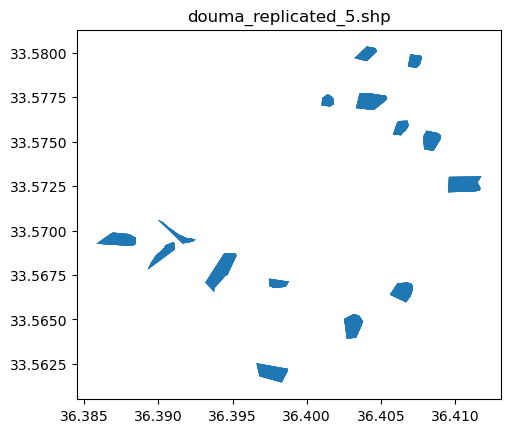

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

def replicate_polygons(gdf, N):
    replicated_gdf = gpd.GeoDataFrame(pd.concat([gdf] * N, ignore_index=True), crs=gdf.crs)
    return replicated_gdf

def process_shapefiles_from_directory(directory, N):
    shapefiles = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.shp')]

    for shapefile in shapefiles:
        gdf = gpd.read_file(shapefile)
        print(f"Processing shapefile: {shapefile}")
        print(gdf.head())

        replicated_gdf = replicate_polygons(gdf, N)
        output_shapefile = shapefile.replace('.shp', f'_replicated_{N}.shp')

        replicated_gdf.to_file(output_shapefile, driver='ESRI Shapefile')
        print(f"Saved replicated shapefile: {output_shapefile}")

        replicated_gdf.plot()
        plt.title(f"{os.path.basename(output_shapefile)}")
        plt.show()

def main():
    directory = input("Enter the directory name: ")

    if not os.path.isdir(directory):
        print("Wrong directory. Please try again.")
        return

    filename = input("Enter the shapefile name: ")
    filepath = os.path.join(directory, filename)

    if not os.path.isfile(filepath) or not filepath.endswith('.shp'):
        print("File does not exist or is not a shapefile. Please try again.")
        return

    N = int(input("Enter the number of times to replicate each polygon: "))
    process_shapefiles_from_directory(directory, N)

if __name__ == "__main__":
    main()


In [1]:
import fiona
import pyogrio


In [3]:
import os
os.chdir("c:/")
!pyinstaller --onefile  "duplicate.py"

3104 INFO: PyInstaller: 6.7.0, contrib hooks: 2025.1
3104 INFO: Python: 3.12.3 (conda)
3138 INFO: Platform: Windows-11-10.0.22631-SP0
3139 INFO: wrote c:\duplicate.spec
3146 INFO: Extending PYTHONPATH with paths
['c:\\']
3780 INFO: checking Analysis
4053 INFO: Building because excludes changed
4053 INFO: Running Analysis Analysis-00.toc
4053 INFO: Target bytecode optimization level: 0
4053 INFO: Initializing module dependency graph...
4053 INFO: Caching module graph hooks...
4139 INFO: Analyzing base_library.zip ...
13091 INFO: Loading module hook 'hook-encodings.py' from 'C:\\Users\\anaconda3\\envs\\newee\\Lib\\site-packages\\PyInstaller\\hooks'...
18362 INFO: Loading module hook 'hook-pickle.py' from 'C:\\Users\\anaconda3\\envs\\newee\\Lib\\site-packages\\PyInstaller\\hooks'...
19684 INFO: Loading module hook 'hook-heapq.py' from 'C:\\Users\\anaconda3\\envs\\newee\\Lib\\site-packages\\PyInstaller\\hooks'...
20375 INFO: Caching module dependency graph...
20545 INFO: Looking for Python